In [37]:
import pandas
import scipy
import pickle
import matplotlib.pyplot as plt

In [22]:
crimeDF = pickle.load( open( "df.pickle", "rb" ))
districtDF = pandas.read_csv("./data/PolicePDFs/DistrictData.csv")
policeDF = districtDF.loc[districtDF['Type'] == "Police"]

policeDF.head()

,District,Type,Population,Area sqmi,Under 5,5 to 17,18 to 24,25 to 44,45 to 64,Over 65,Male,Female,Total Familes,Liquor Licenses,Faith Orgs,Parks
0,1,Police,47807,5.087,878,1242,17512,16030,7840,4305,26092,21715,4787,398,46,57
1,2,Police,85671,7.111,9501,20535,10111,26667,14386,4471,44206,41465,25291,231,81,54
2,3,Police,82030,11.868,6935,15451,16285,21378,16882,5098,39606,42424,15925,147,156,78
3,4,Police,94295,28.782,9037,21385,9778,24858,20389,8848,42805,51490,23283,62,69,102
4,5,Police,67841,7.719,5664,14139,8729,18674,14574,6061,31960,35881,14640,146,160,60


In [30]:
crimeCounts = pandas.DataFrame(crimeDF['Police District'].value_counts())
print(districtDF.columns)
print(crimeCounts.columns)
crimeCounts.loc[1, 'Police District']

Index(['District', 'Type', 'Population', 'Area sqmi', 'Under 5', '5 to 17',
       '18 to 24', '25 to 44', '45 to 64', 'Over 65', 'Male', 'Female',
       'Total Familes', 'Liquor Licenses', 'Faith Orgs', 'Parks'],
      dtype='object')
Index(['Police District'], dtype='object')


8445

In [31]:
#pandas.merge(policeDF, crimeCounts, how='left', on=['District', 'Police District'])
for index, row in policeDF.iterrows():
    district = row['District']
    policeDF.loc[index, 'CrimeCount'] = crimeCounts.loc[district, 'Police District']

C:\Users\marie\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\marie\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [32]:
policeDF

,District,Type,Population,Area sqmi,Under 5,5 to 17,18 to 24,25 to 44,45 to 64,Over 65,Male,Female,Total Familes,Liquor Licenses,Faith Orgs,Parks,CrimeCount
0,1,Police,47807,5.087,878,1242,17512,16030,7840,4305,26092,21715,4787,398,46,57,8445.0
1,2,Police,85671,7.111,9501,20535,10111,26667,14386,4471,44206,41465,25291,231,81,54,9687.0
2,3,Police,82030,11.868,6935,15451,16285,21378,16882,5098,39606,42424,15925,147,156,78,11914.0
3,4,Police,94295,28.782,9037,21385,9778,24858,20389,8848,42805,51490,23283,62,69,102,10339.0
4,5,Police,67841,7.719,5664,14139,8729,18674,14574,6061,31960,35881,14640,146,160,60,11128.0
5,6,Police,114117,22.729,8242,17664,9117,34869,29069,15156,55659,58458,28251,228,61,74,7882.0
6,7,Police,102336,13.342,8408,22195,9788,27861,24895,9189,46248,56088,25500,77,135,78,11975.0


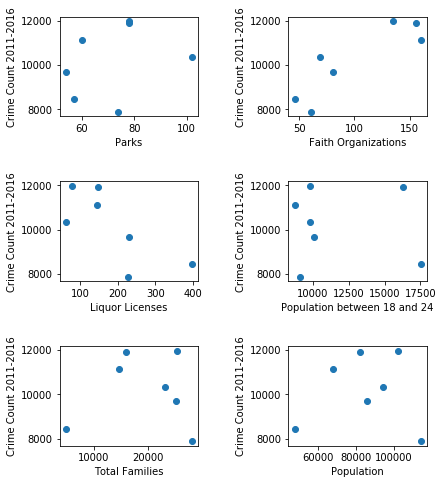

In [78]:
plt.subplot(3,2,1)
plt.scatter(policeDF['Parks'], policeDF['CrimeCount'])
plt.ylabel('Crime Count 2011-2016')
plt.xlabel('Parks')
 
plt.subplot(3,2,2)
plt.scatter(policeDF['Faith Orgs'], policeDF['CrimeCount'])
plt.ylabel('Crime Count 2011-2016')
plt.xlabel('Faith Organizations')
 
plt.subplot(3,2,3)
plt.scatter(policeDF['Liquor Licenses'], policeDF['CrimeCount'])
plt.ylabel('Crime Count 2011-2016')
plt.xlabel('Liquor Licenses')
 
plt.subplot(3,2,4)
plt.scatter(policeDF['18 to 24'], policeDF['CrimeCount'])
plt.ylabel('Crime Count 2011-2016')
plt.xlabel('Population between 18 and 24')

plt.subplot(3,2,5)
plt.scatter(policeDF['Total Familes'], policeDF['CrimeCount'])
plt.ylabel('Crime Count 2011-2016')
plt.xlabel('Total Families')

plt.subplot(3,2,6)
plt.scatter(policeDF['Population'], policeDF['CrimeCount'])
plt.ylabel('Crime Count 2011-2016')
plt.xlabel('Population')

plt.subplots_adjust(top=1.5, bottom=0.01, left=0.10, right=0.95, hspace=0.65, wspace=0.65)
plt.show()

In [62]:
policeNorm = policeDF
policeNorm['PopDensity'] = policeNorm['Population']/policeNorm['Area sqmi']
policeNorm['Percent 18 to 24'] = policeNorm['18 to 24']/policeNorm['Population']
policeNorm['Percent Families'] = policeNorm['Total Familes']/policeNorm['Population']
policeNorm['Liquor per sqmi'] = policeNorm['Liquor Licenses']/policeNorm['Area sqmi']
policeNorm['Faith Orgs per sqmi'] = policeNorm['Faith Orgs']/policeNorm['Area sqmi']
policeNorm['Parks per sqmi'] = policeNorm['Parks']/policeNorm['Area sqmi']
policeNorm['Crime per sqmi'] = policeNorm['CrimeCount']/policeNorm['Area sqmi']

policeNorm

C:\Users\marie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\marie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\marie\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,District,Type,Population,Area sqmi,Under 5,5 to 17,18 to 24,25 to 44,45 to 64,Over 65,...,Faith Orgs,Parks,CrimeCount,PopDensity,Percent 18 to 24,Percent Families,Liquor per sqmi,Faith Orgs per sqmi,Parks per sqmi,Crime per sqmi
0,1,Police,47807,5.087,878,1242,17512,16030,7840,4305,...,46,57,8445.0,9397.876941,0.366306,0.100132,78.238648,9.042658,11.205032,1660.114016
1,2,Police,85671,7.111,9501,20535,10111,26667,14386,4471,...,81,54,9687.0,12047.672620,0.118021,0.295211,32.484883,11.390803,7.593869,1362.255660
2,3,Police,82030,11.868,6935,15451,16285,21378,16882,5098,...,156,78,11914.0,6911.863836,0.198525,0.194136,12.386249,13.144590,6.572295,1003.875969
3,4,Police,94295,28.782,9037,21385,9778,24858,20389,8848,...,69,102,10339.0,3276.179557,0.103696,0.246917,2.154124,2.397332,3.543882,359.217567
4,5,Police,67841,7.719,5664,14139,8729,18674,14574,6061,...,160,60,11128.0,8788.832750,0.128669,0.215799,18.914367,20.728074,7.773028,1441.637518
5,6,Police,114117,22.729,8242,17664,9117,34869,29069,15156,...,61,74,7882.0,5020.766422,0.079892,0.247562,10.031238,2.683796,3.255753,346.781645
6,7,Police,102336,13.342,8408,22195,9788,27861,24895,9189,...,135,78,11975.0,7670.214361,0.095646,0.249179,5.771249,10.118423,5.846200,897.541598


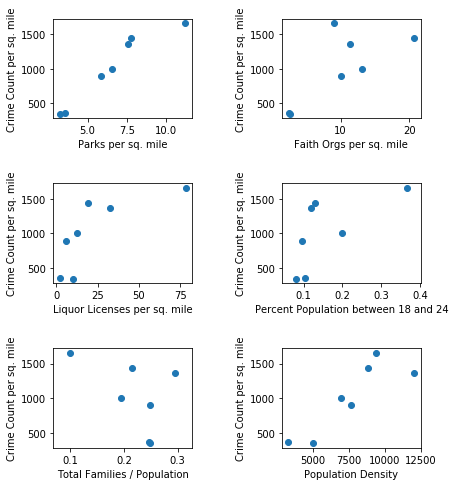

In [81]:
plt.subplot(3,2,1)
plt.scatter(policeNorm['Parks per sqmi'], policeNorm['Crime per sqmi'])
plt.ylabel('Crime Count per sq. mile')
plt.xlabel('Parks per sq. mile')
 
plt.subplot(3,2,2)
plt.scatter(policeNorm['Faith Orgs per sqmi'], policeNorm['Crime per sqmi'])
plt.ylabel('Crime Count per sq. mile')
plt.xlabel('Faith Orgs per sq. mile')
 
plt.subplot(3,2,3)
plt.scatter(policeNorm['Liquor per sqmi'], policeNorm['Crime per sqmi'])
plt.ylabel('Crime Count per sq. mile')
plt.xlabel('Liquor Licenses per sq. mile')
 
plt.subplot(3,2,4)
plt.scatter(policeNorm['Percent 18 to 24'], policeNorm['Crime per sqmi'])
plt.ylabel('Crime Count per sq. mile')
plt.xlabel('Percent Population between 18 and 24')

plt.subplot(3,2,5)
plt.scatter(policeNorm['Percent Families'], policeNorm['Crime per sqmi'])
plt.ylabel('Crime Count per sq. mile')
plt.xlabel('Total Families / Population')

plt.subplot(3,2,6)
plt.scatter(policeNorm['PopDensity'], policeNorm['Crime per sqmi'])
plt.ylabel('Crime Count per sq. mile')
plt.xlabel('Population Density')

plt.subplots_adjust(top=1.5, bottom=0.01, left=0.10, right=0.95, hspace=0.65, wspace=0.65)
plt.show()